In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

In [5]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d hafiznouman786/potato-plant-diseases-data

Dataset URL: https://www.kaggle.com/datasets/hafiznouman786/potato-plant-diseases-data
License(s): CC0-1.0
100% 75.7M/75.7M [00:05<00:00, 20.4MB/s]
100% 75.7M/75.7M [00:05<00:00, 15.2MB/s]


In [6]:
!ls

kaggle.json  PlantVillage  potato-plant-diseases-data.zip  PotatoPlants  sample_data


In [8]:
with ZipFile("potato-plant-diseases-data.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
print(os.listdir("PotatoPlants"))


print(len(os.listdir("PotatoPlants/Potato___Early_blight")))
print(os.listdir("PotatoPlants/Potato___Early_blight")[:5])

print(len(os.listdir("PotatoPlants/Potato___Late_blight")))
print(os.listdir("PotatoPlants/Potato___Late_blight")[:5])

print(len(os.listdir("PotatoPlants/Potato___healthy")))
print(os.listdir("PotatoPlants/Potato___healthy")[:5])

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
1000
['7ea05f87-83d3-405e-84ee-f637426f4bab___RS_Early.B 6715.JPG', '811eba3a-112e-43dd-8b22-57f3cde4c504___RS_Early.B 7983.JPG', '68f056c9-4989-4809-b597-3739ff66afc3___RS_Early.B 8748.JPG', '5bb77b39-311b-4ad1-8bfc-5a41a13b7b02___RS_Early.B 8255.JPG', '4a4847c4-c393-4772-8035-e39b472e179b___RS_Early.B 7167.JPG']
1000
['2ed031ef-c77f-42d2-83fa-4fbfc66d67b2___RS_LB 5254.JPG', '4d213f48-e73a-45bf-badd-ead51dda60b4___RS_LB 2981.JPG', '89ad1a3c-db3c-4d75-9c92-64cea1433f89___RS_LB 2820.JPG', '0acdc2b2-0dde-4073-8542-6fca275ab974___RS_LB 4857.JPG', '14b29609-0bde-4d56-ac07-5db1b6df6fce___RS_LB 4983.JPG']
152
['5cb360dd-5c17-4c57-b31d-97cd8dd8d0bd___RS_HL 1797.JPG', 'bf2bffbb-cd8f-4d36-bd58-847808397c75___RS_HL 1786.JPG', '4ae82355-6885-40e7-9807-dabe46ed3441___RS_HL 5410.JPG', '45bc0b37-ca59-4a89-8531-705af42a6fd5___RS_HL 1946.JPG', '56ae1281-5ee5-4f2a-8678-c2e4491878c6___RS_HL 1869.JPG']


In [8]:
base_dir = 'PotatoPlants'

(256, 256, 3)


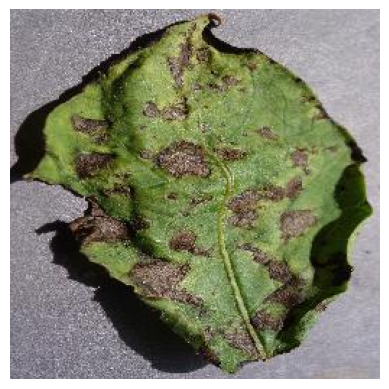

In [9]:
image_path = '/content/PotatoPlants/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [10]:
image_path = '/content/PotatoPlants/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[123 120 127]
  [161 158 165]
  [148 145 152]
  ...
  [174 171 178]
  [171 168 175]
  [169 166 173]]

 [[131 128 135]
  [148 145 152]
  [142 139 146]
  ...
  [184 181 188]
  [180 177 184]
  [176 173 180]]

 [[150 147 154]
  [134 131 138]
  [132 129 136]
  ...
  [179 176 183]
  [175 172 179]
  [172 169 176]]

 ...

 [[149 145 159]
  [117 113 127]
  [130 126 140]
  ...
  [160 158 169]
  [161 159 172]
  [161 159 172]]

 [[108 104 118]
  [105 101 115]
  [126 122 136]
  ...
  [162 160 171]
  [163 161 174]
  [164 162 175]]

 [[147 143 157]
  [ 93  89 103]
  [128 124 138]
  ...
  [169 167 178]
  [172 170 183]
  [173 171 184]]]


In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [12]:
img_size = 224
batch_size = 32
epochs = 50

In [13]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3
)

In [14]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 1507 images belonging to 3 classes.


In [15]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 645 images belonging to 3 classes.


In [16]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [17]:
base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Đóng băng các lớp của MobileNetV2

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [18]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [20]:
# Flatten và Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))  # Dropout mạnh hơn ở lớp Fully Connected
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [19]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),  # Giảm learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weights_dict,  # Sử dụng class weights
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 650ms/step - accuracy: 0.4510 - loss: 5.3238 - val_accuracy: 0.8500 - val_loss: 4.4288 - learning_rate: 1.0000e-04
Epoch 2/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6875 - loss: 4.6720

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 256ms/step - accuracy: 0.6875 - loss: 4.6720 - val_accuracy: 1.0000 - val_loss: 4.2302 - learning_rate: 1.0000e-04
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 493ms/step - accuracy: 0.7721 - loss: 4.4130 - val_accuracy: 0.9344 - val_loss: 3.9244 - learning_rate: 1.0000e-04
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.8438 - loss: 4.0581 - val_accuracy: 0.8000 - val_loss: 4.1265 - learning_rate: 1.0000e-04
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 485ms/step - accuracy: 0.8626 - loss: 3.9575 - val_accuracy: 0.9281 - val_loss: 3.6203 - learning_rate: 1.0000e-04
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9688 - loss: 3.6889 - val_accuracy: 0.8000 - val_loss: 3.7506 - learning_rate: 1.0000e-04
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 512ms/step - accuracy: 0.8758 - loss: 3.6270 - val_accuracy: 0.9266 - val_loss: 3.3495 - learning_rate: 1.0000e-04
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - 

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

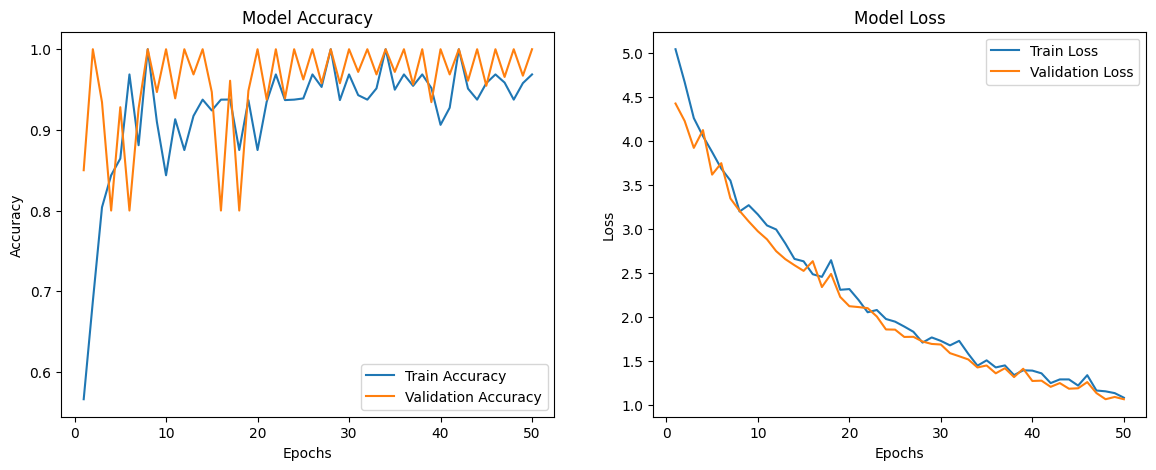

In [26]:
# Vẽ biểu đồ Accuracy và Loss
def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Biểu đồ Accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Biểu đồ Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Train Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Gọi hàm hiển thị biểu đồ
plot_training_history(history)

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 523ms/step


<Figure size 800x800 with 0 Axes>

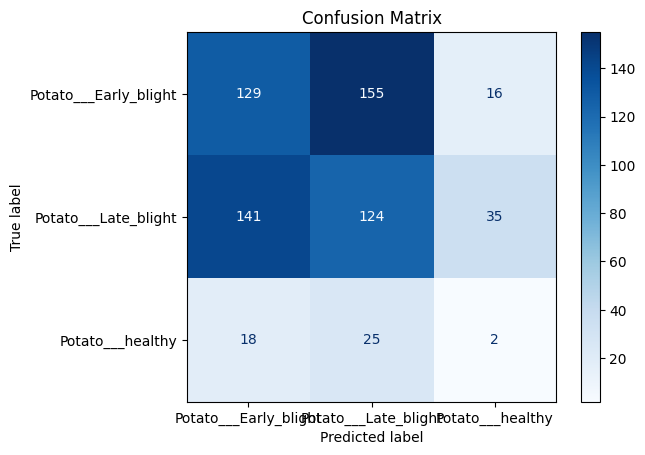

In [28]:
def plot_confusion_matrix(model, generator):
    # Số bước để đảm bảo tất cả các mẫu đều được dự đoán
    steps = int(np.ceil(generator.samples / generator.batch_size))

    # Dự đoán kết quả
    y_pred = model.predict(generator, steps=steps)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = generator.classes[:len(y_pred_classes)]  # Đảm bảo kích thước khớp

    # Tính ma trận nhầm lẫn
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=generator.class_indices.keys())

    # Hiển thị ma trận nhầm lẫn
    plt.figure(figsize=(8, 8))
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()

# Gọi hàm hiển thị ma trận nhầm lẫn
plot_confusion_matrix(model, validation_generator)

In [29]:
base_model.trainable = True  # Cho phép huấn luyện toàn bộ mô hình
# Hoặc chỉ mở khóa các lớp cuối (fine-tuning có kiểm soát)
for layer in base_model.layers[:100]:
    layer.trainable = False

In [30]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),  # Learning rate thấp hơn để tránh "quá học"
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [32]:
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,  # Huấn luyện thêm 30 epoch, tùy chỉnh theo tình hình
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weights_dict,  # Tiếp tục sử dụng class weights
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 780ms/step - accuracy: 0.8943 - loss: 1.4586 - val_accuracy: 0.9250 - val_loss: 1.2414 - learning_rate: 1.0000e-05
Epoch 2/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9062 - loss: 1.3269

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9062 - loss: 1.3269 - val_accuracy: 1.0000 - val_loss: 1.0626 - learning_rate: 1.0000e-05
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 519ms/step - accuracy: 0.9029 - loss: 1.2993 - val_accuracy: 0.9203 - val_loss: 1.2827 - learning_rate: 1.0000e-05
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9375 - loss: 1.2222 - val_accuracy: 1.0000 - val_loss: 1.3202 - learning_rate: 1.0000e-05
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 509ms/step - accuracy: 0.9297 - loss: 1.2273 - val_accuracy: 0.9141 - val_loss: 1.2570 - learning_rate: 1.0000e-05
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.9375 - loss: 1.3297 - val_accuracy: 1.0000 - val_loss: 1.0695 - learning_rate: 1.0000e-05
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 503ms/step - accuracy: 0.9292 - loss: 1.1978 - val_accuracy: 0.8984 - val_loss: 1.2958 - learning_rate: 1.0000e-05
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9062 - lo

In [34]:
import seaborn as sns

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 436ms/step


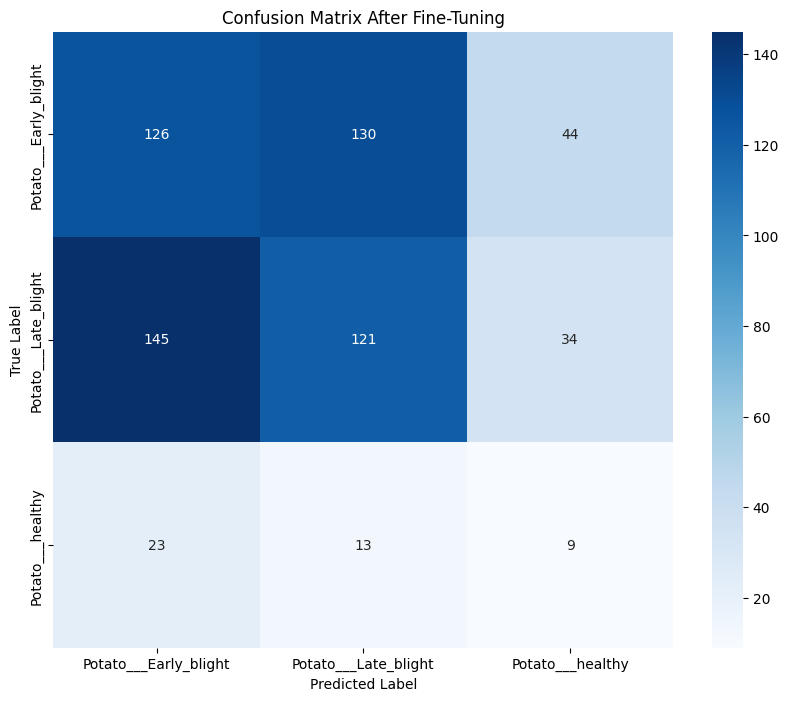

NameError: name 'classification_report' is not defined

In [35]:
# Dự đoán trên tập validation
val_steps = validation_generator.samples // batch_size
Y_pred = model.predict(validation_generator, steps=val_steps + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Ma trận nhầm lẫn
cm = confusion_matrix(validation_generator.classes[:len(y_pred)], y_pred)
class_names = list(validation_generator.class_indices.keys())

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix After Fine-Tuning')
plt.show()

# Báo cáo chi tiết

In [36]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,  # Bổ sung lật dọc
    fill_mode='nearest',
    validation_split=0.3
)


In [38]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Trả về kiểu float
    else:
        return float(lr * tf.math.exp(-0.1))  # Chuyển đổi về kiểu float

lr_schedule = LearningRateScheduler(lr_scheduler)

history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, lr_schedule]
)


Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 531ms/step - accuracy: 0.8963 - loss: 1.2422 - val_accuracy: 0.9234 - val_loss: 1.2455 - learning_rate: 1.0000e-06
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9688 - loss: 1.1954 - val_accuracy: 1.0000 - val_loss: 1.0717 - learning_rate: 1.0000e-06
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 496ms/step - accuracy: 0.9144 - loss: 1.2260 - val_accuracy: 0.9234 - val_loss: 1.2472 - learning_rate: 1.0000e-06
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 1.0000 - loss: 1.1224 - val_accuracy: 0.8000 - val_loss: 1.6078 - learning_rate: 1.0000e-06
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 515ms/step - accuracy: 0.9187 - loss: 1.2243 - val_accuracy: 0.9375 - val_loss: 1.2201 - learning_rate: 1.0000e-06
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9062 - loss: 1.2034 - val_accuracy: 1.0000 - val_loss: 1.0655 - learning_rate: 1.0000e-06
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 514ms/step - accura

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 397ms/step


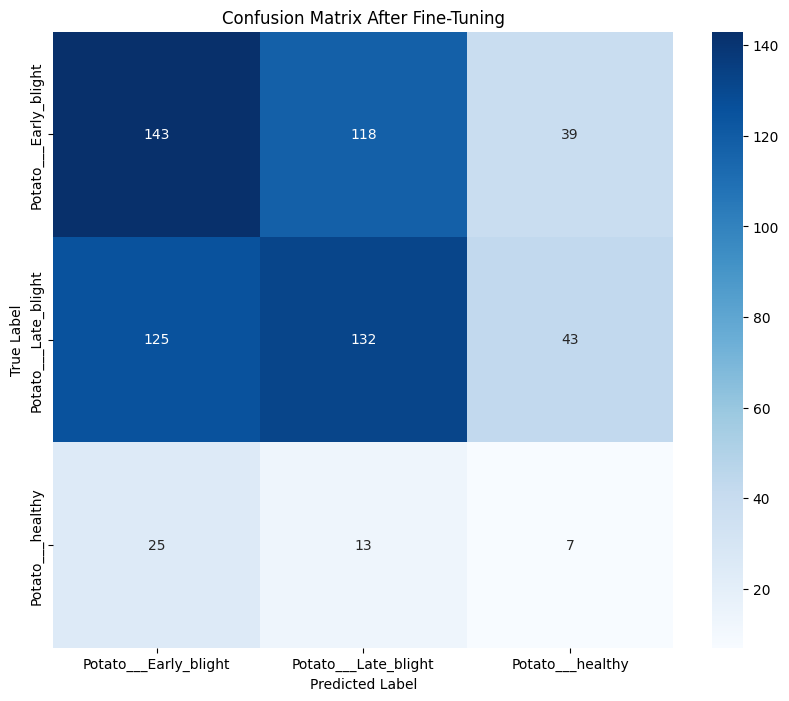

In [39]:
val_steps = validation_generator.samples // batch_size
Y_pred = model.predict(validation_generator, steps=val_steps + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Ma trận nhầm lẫn
cm = confusion_matrix(validation_generator.classes[:len(y_pred)], y_pred)
class_names = list(validation_generator.class_indices.keys())

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix After Fine-Tuning')
plt.show()

In [40]:
val_steps = validation_generator.samples // batch_size
Y_pred = model.predict(validation_generator, steps=val_steps + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Lấy tên các lớp
class_names = list(validation_generator.class_indices.keys())

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step


In [42]:
from sklearn.metrics import classification_report
import pandas as pd

In [43]:
report = classification_report(
    validation_generator.classes[:len(y_pred)],
    y_pred,
    target_names=class_names,
    output_dict=True
)

In [44]:
# Chuyển báo cáo thành DataFrame để dễ xử lý
report_df = pd.DataFrame(report).transpose()

# Chỉ lấy các chỉ số liên quan đến Precision, Recall, F1-score cho từng lớp
metrics_df = report_df.loc[class_names, ['precision', 'recall', 'f1-score']]


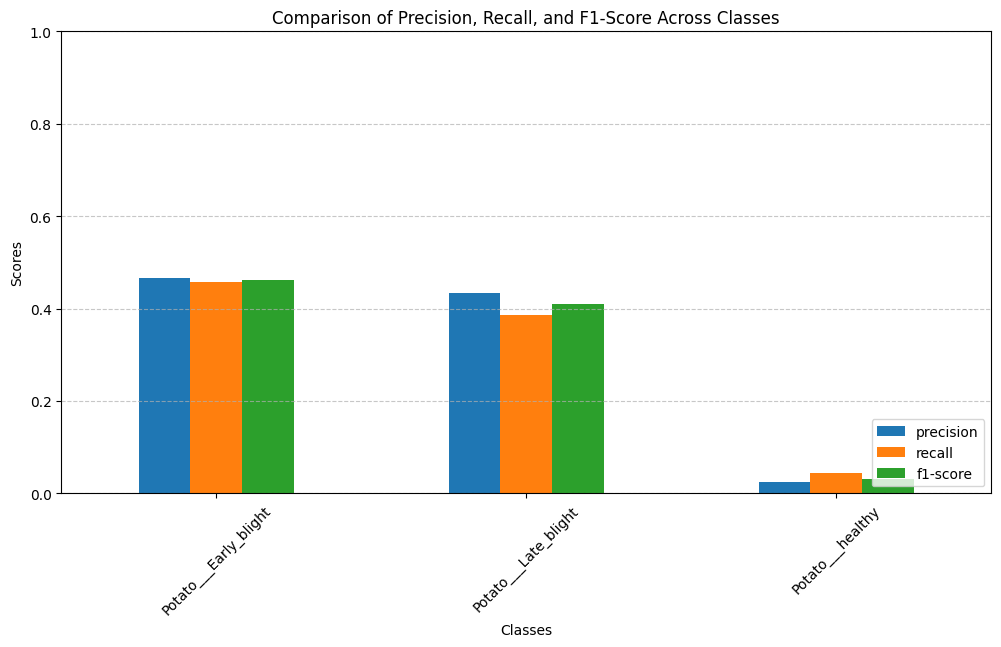

In [45]:
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Precision, Recall, and F1-Score Across Classes')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Các chỉ số trong khoảng [0, 1]
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [47]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,966,987 (26.58 MB)

 Trainable params: 2,190,147 (8.35 MB)

 Non-trainable params: 396,544 (1.51 MB)

 Optimizer params: 4,380,296 (16.71 MB)

In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Lấy số lớp
n_classes = train_generator.num_classes

# One-hot encoding nhãn thực tế
y_true = label_binarize(validation_generator.classes[:len(Y_pred)], classes=range(n_classes))

# Xác suất dự đoán
y_score = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 369ms/step


In [49]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tính micro-average ROC (gộp tất cả các lớp)
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


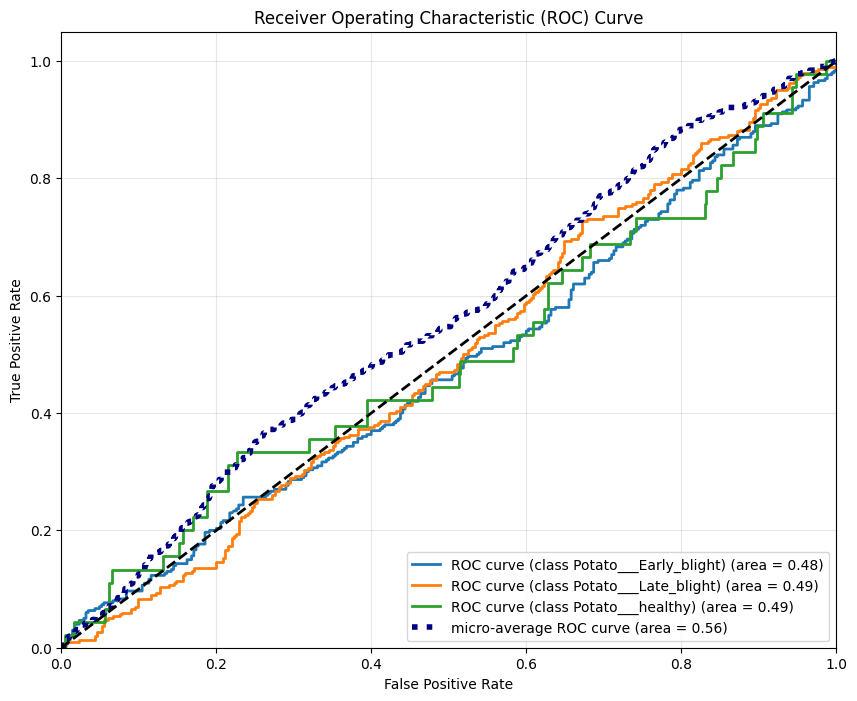

In [50]:
plt.figure(figsize=(10, 8))

# Vẽ ROC cho từng lớp
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {class_name}) (area = {roc_auc[i]:0.2f})')

# Vẽ micro-average ROC
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
         color='navy', linestyle=':', linewidth=4)

# Đường y=x
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, regularizers
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [52]:
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [53]:
base_model.trainable = True  # Mở khóa toàn bộ MobileNetV2
# Chỉ mở khóa các lớp trên cùng để tránh overfitting
for layer in base_model.layers[:100]:  # Mở khóa từ lớp 100 trở đi
    layer.trainable = False

In [54]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),  # Dropout mạnh để giảm overfitting
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [55]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Learning rate nhỏ để tinh chỉnh
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [59]:
early_stopping = EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=4, min_lr=1e-6)

def lr_scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)  # Chuyển thành float
    else:
        # Chuyển đổi kết quả `tf.math.exp` sang float
        return float(lr * tf.math.exp(-0.1).numpy())


In [61]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Hàm điều chỉnh learning rate
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)  # Trả về kiểu float
    else:
        return float(lr * tf.math.exp(-0.1).numpy())  # Chuyển Tensor thành float

lr_schedule = LearningRateScheduler(lr_scheduler)

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,  # Huấn luyện thêm 30 epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weights_dict,  # Sử dụng class weights
    callbacks=[early_stopping, reduce_lr, lr_schedule]  # Sử dụng callback LearningRateScheduler
)


Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 543ms/step - accuracy: 0.9018 - loss: 4.4308 - val_accuracy: 0.7953 - val_loss: 4.6629 - learning_rate: 1.0000e-05
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 4.3922 - val_accuracy: 1.0000 - val_loss: 4.3011 - learning_rate: 1.0000e-05
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 517ms/step - accuracy: 0.8949 - loss: 4.4439 - val_accuracy: 0.8219 - val_loss: 4.5671 - learning_rate: 1.0000e-05
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9062 - loss: 4.3310 - val_accuracy: 0.4000 - val_loss: 5.1738 - learning_rate: 1.0000e-05
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 506ms/step - accuracy: 0.9195 - loss: 4.3352 - val_accuracy: 0.8266 - val_loss: 4.5174 - learning_rate: 1.0000e-05
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 4.2753 - val_accuracy: 1.0000 - val_loss: 4.2227 - learning_rate: 9.0484e-06
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 509ms/step - accuracy: 

In [58]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, min_delta=1e-4, restore_best_weights=True)


In [62]:
from sklearn.metrics import classification_report

# Dự đoán trên tập validation
val_steps = validation_generator.samples // batch_size
Y_pred = model.predict(validation_generator, steps=val_steps + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Báo cáo chi tiết
class_names = list(validation_generator.class_indices.keys())
report = classification_report(
    validation_generator.classes[:len(y_pred)],
    y_pred,
    target_names=class_names
)
print(report)

21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step
                       precision    recall  f1-score   support

Potato___Early_blight       0.46      0.43      0.44       300
 Potato___Late_blight       0.45      0.36      0.40       300
     Potato___healthy       0.08      0.22      0.12        45

             accuracy                           0.38       645
            macro avg       0.33      0.34      0.32       645
         weighted avg       0.43      0.38      0.40       645



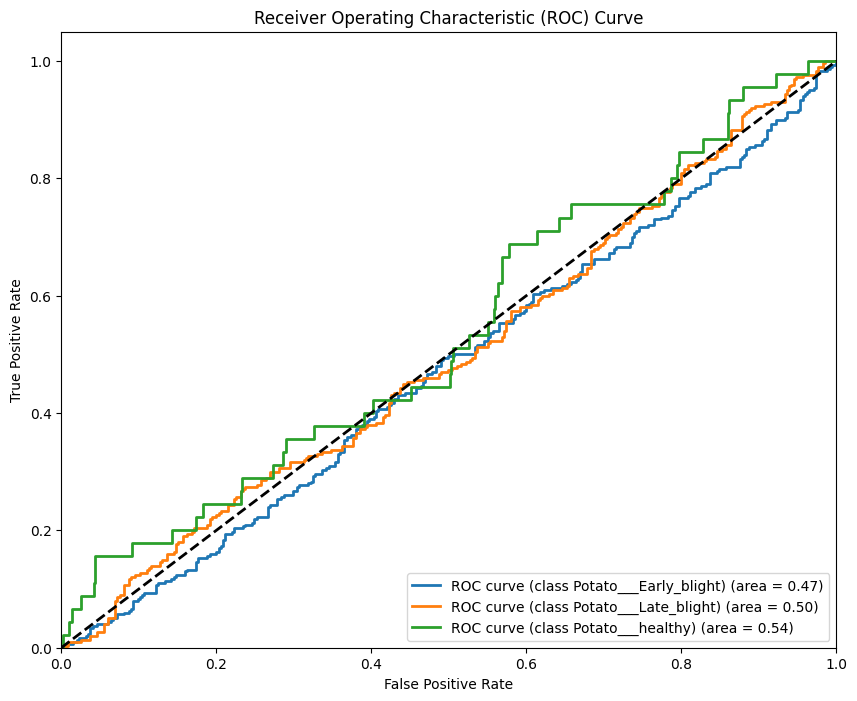

In [63]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# One-hot encoding nhãn thực tế
y_true = label_binarize(validation_generator.classes[:len(Y_pred)], classes=range(train_generator.num_classes))

# Tính ROC và AUC cho từng lớp
fpr = {}
tpr = {}
roc_auc = {}

for i in range(train_generator.num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Vẽ biểu đồ ROC cho từng lớp
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"ROC curve (class {class_name}) (area = {roc_auc[i]:.2f})")

# Đường y=x
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step


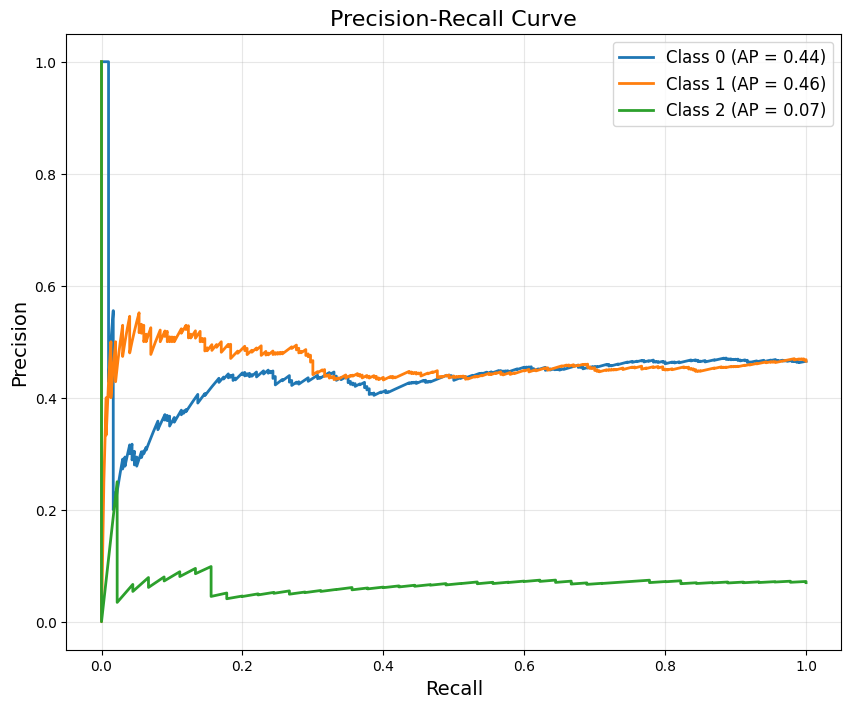

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Bước 1: Dự đoán xác suất trên tập validation
y_true = validation_generator.classes  # Nhãn thực tế
y_pred_prob = model.predict(validation_generator)  # Xác suất dự đoán

# Chuyển đổi nhãn thực tế thành one-hot encoding nếu cần
from tensorflow.keras.utils import to_categorical
y_true_onehot = to_categorical(y_true, num_classes=train_generator.num_classes)

# Bước 2: Tính Precision, Recall và Average Precision cho từng lớp
precision = {}
recall = {}
average_precision = {}

for i in range(train_generator.num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_onehot[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_true_onehot[:, i], y_pred_prob[:, i])

# Tính Average Precision tổng thể (macro)
average_precision["macro"] = np.mean(list(average_precision.values()))

# Bước 3: Vẽ biểu đồ Precision-Recall cho từng lớp
plt.figure(figsize=(10, 8))
for i in range(train_generator.num_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [65]:
model.save('model_3.h5')

In [66]:
# Kiểm tra tổng số tham số trong mô hình
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,966,987 (26.58 MB)

 Trainable params: 2,190,147 (8.35 MB)

 Non-trainable params: 396,544 (1.51 MB)

 Optimizer params: 4,380,296 (16.71 MB)

In [67]:
# Kiểm tra các lớp và số tham số trong từng lớp
for layer in model.layers:
    print(f'{layer.name}: {layer.count_params()} parameters')


mobilenetv2_1.00_224: 2257984 parameters
global_average_pooling2d_1: 0 parameters
dense_2: 327936 parameters
dropout_1: 0 parameters
dense_3: 771 parameters


In [68]:
# Kiểm tra trọng số của mô hình
for layer in model.layers:
    print(f'{layer.name} weights shape: {layer.get_weights()}')


mobilenetv2_1.00_224 weights shape: [array([[[[-1.71659231e-01, -3.33731920e-01,  5.30122258e-02,
          -5.93232973e-21,  2.08742931e-01, -1.20433941e-01,
           1.75700430e-02, -3.10708203e-22, -9.62498877e-03,
           1.90229788e-01, -3.67278278e-01,  3.95997976e-22,
          -2.36236629e-22,  3.36706383e-22,  8.83555040e-02,
          -7.75416642e-02,  3.95842289e-05, -3.63377742e-02,
           5.99925742e-02,  5.53736472e-21, -4.68022423e-04,
          -1.23387486e-01, -1.34351701e-01,  8.75968020e-03,
          -2.47503355e-01,  1.58492010e-02, -2.43145856e-04,
          -1.09811597e-01,  5.55126644e-22, -2.03368161e-03,
           2.83311605e-01,  7.66634047e-02],
         [-3.18941772e-01, -6.09864295e-01, -1.70770675e-01,
          -6.76705635e-21, -5.82342505e-01, -2.56068230e-01,
          -4.18974347e-02,  1.32427304e-22,  2.00757684e-04,
           3.29488933e-01, -4.01886106e-01,  3.63034420e-22,
           1.64733595e-22,  1.97648923e-22,  9.94425565e-02,
   

In [69]:
base_dir = 'PotatoPlants'

In [70]:
all_class_names = sorted(os.listdir(base_dir))

# In danh sách ra màn hình
print(all_class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [71]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,

    label_mode='int',
    class_names=all_class_names  # Chỉ sử dụng các lớp đã chọn
)

Found 2152 files belonging to 3 classes.


In [72]:
print(type(dataset))
print(len(dataset))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
68


In [73]:
class_names = dataset.class_names

image_counts = {class_name: len(os.listdir(os.path.join(base_dir, class_name))) for class_name in class_names}

print("Class names and their corresponding integer labels:")
for index, class_name in enumerate(class_names):
    print(f"{index}: {class_name}")

Class names and their corresponding integer labels:
0: Potato___Early_blight
1: Potato___Late_blight
2: Potato___healthy


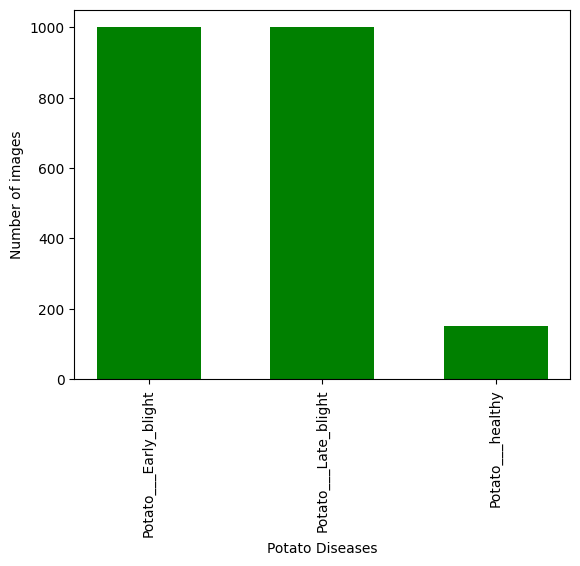

In [74]:
plt.bar(list(image_counts.keys()), list(image_counts.values()), color = 'green', width = 0.6)
plt.xlabel("Potato Diseases")
plt.ylabel("Number of images")
plt.xticks(rotation = 90)
plt.show()

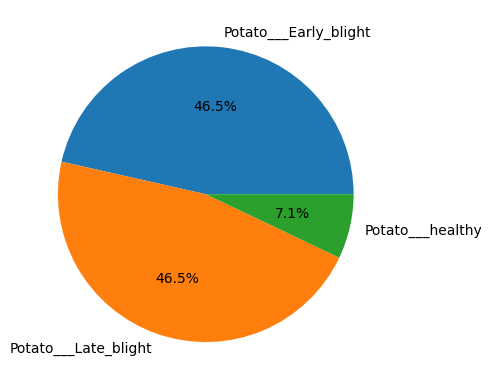

In [75]:
plt.pie(list(image_counts.values()), labels = list(image_counts.keys()), autopct='%1.1f%%')
plt.show()

In [78]:
model.save('model_4.h5')